In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:

tf.keras.backend.clear_session()


In [3]:
# Daten einlesen
data = pd.read_csv('model_new.csv')

In [4]:
data.head()

,R1_1,R1_2,R1_3,R1_4,R1_5,R1_6,R3_1,R3_2,R3_3,R3_4,R3_5,R3_6,R4_1,R4_2,R4_3,R4_4,R4_5,R4_6,class,activity
0,0.001111,0.000219,0.000439,0.000362,0.000342,0.000650,0.000268,0.000650,0.000537,0.000116,0.000094,0.000552,0.000920,0.001127,0.000246,0.000292,0.000431,0.001656,1,drilling
1,0.001377,0.001184,0.001193,0.000865,0.000210,0.001131,0.001096,0.000345,0.000496,0.000823,0.000070,0.000124,0.000499,0.000291,0.000759,0.000554,0.001224,0.001280,1,drilling
2,0.000603,0.001458,0.001701,0.001461,0.000691,0.001315,0.000762,0.000343,0.000061,0.000129,0.000610,0.000255,0.000404,0.000404,0.000598,0.001617,0.002922,0.001125,1,drilling
3,0.000647,0.001622,0.001138,0.001645,0.000174,0.000324,0.000486,0.000302,0.000255,0.000283,0.000259,0.000209,0.000935,0.000325,0.001138,0.000907,0.002185,0.001153,1,drilling
4,0.000496,0.002436,0.001304,0.001717,0.000259,0.001168,0.001910,0.000633,0.000451,0.000512,0.000406,0.000285,0.000265,0.000633,0.001719,0.000485,0.002365,0.001859,1,drilling


<Axes: title={'center': 'Activity type'}, xlabel='activity'>

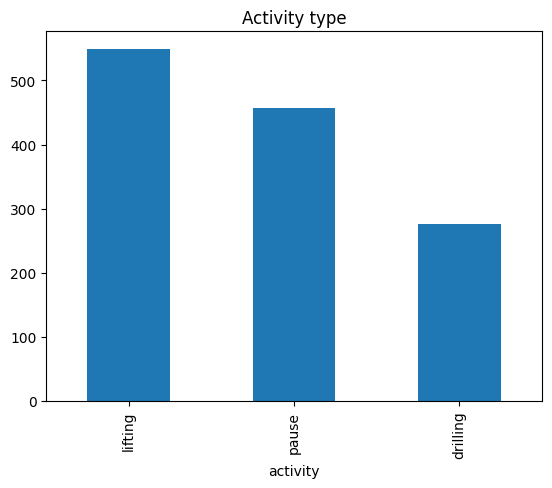

In [5]:
data['activity'].value_counts().plot(kind='bar', title='Activity type')

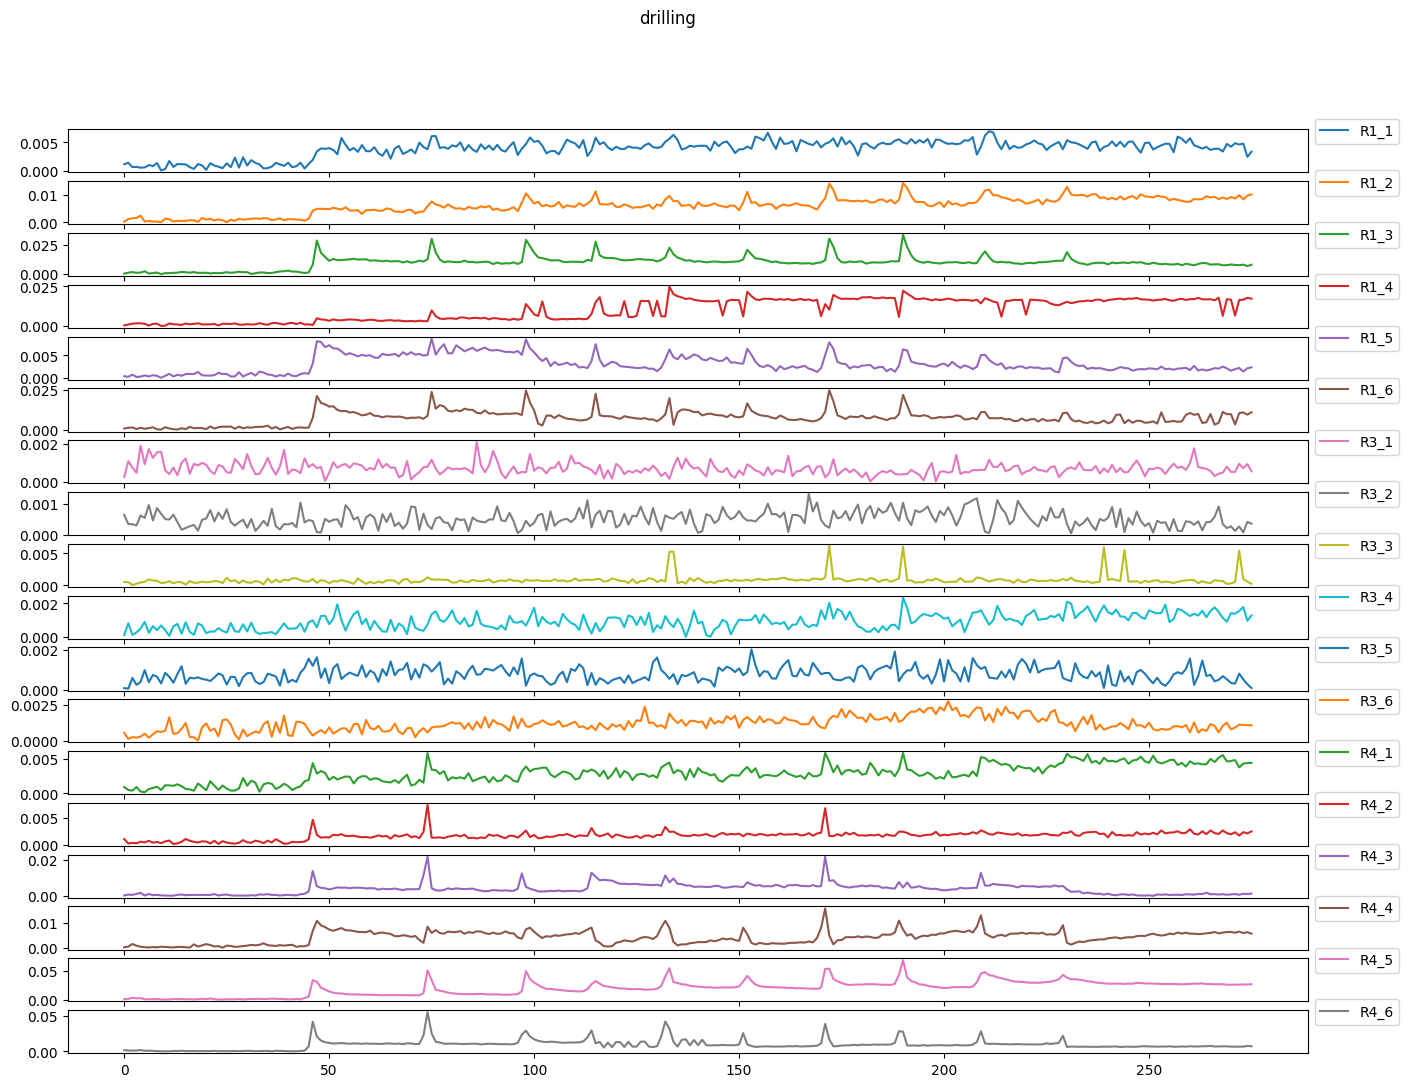

In [6]:
def plot_activity(activity, df):
    data = df[df['activity'] == activity][['R1_1', 'R1_2', 'R1_3', 'R1_4', 'R1_5', 'R1_6', 'R3_1', 'R3_2', 'R3_3', 'R3_4', 'R3_5', 'R3_6', 'R4_1', 'R4_2', 'R4_3', 'R4_4', 'R4_5', 'R4_6']]
    axis = data.plot(subplots=True, figsize=(16, 12), title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

plot_activity("drilling", data)


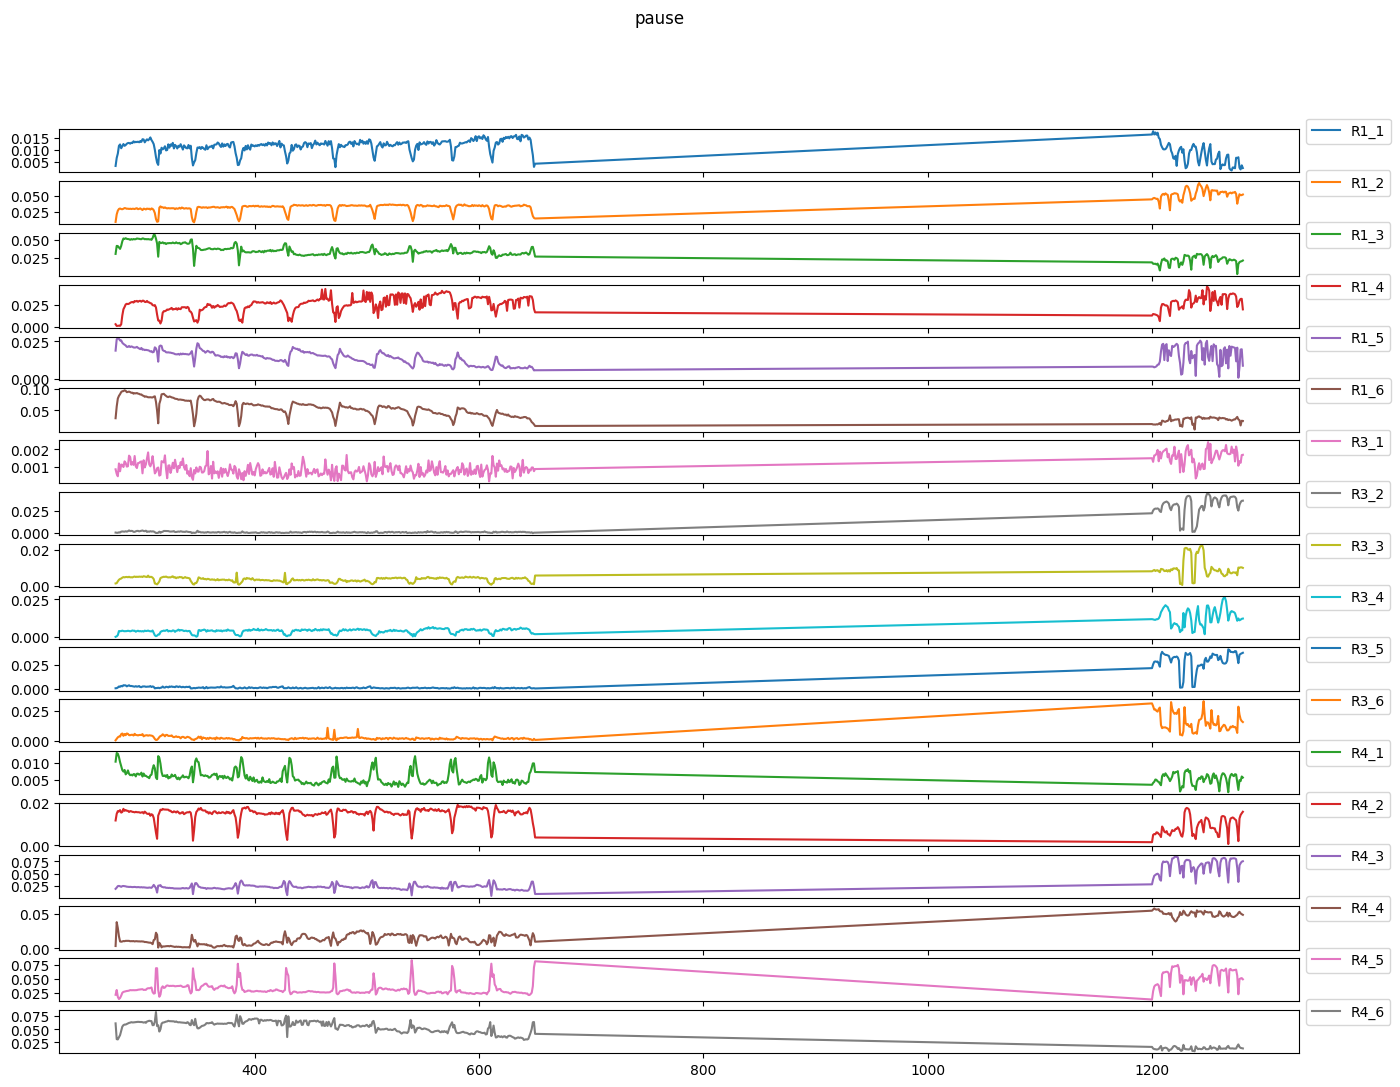

In [7]:
plot_activity("pause", data)

In [8]:
# Preprocessing
X = data.drop(['class', 'activity'], axis=1)
y = data['class']
activity_labels = data['activity']
num_classes = 4

In [9]:
X

,R1_1,R1_2,R1_3,R1_4,R1_5,R1_6,R3_1,R3_2,R3_3,R3_4,R3_5,R3_6,R4_1,R4_2,R4_3,R4_4,R4_5,R4_6
0,0.001111,0.000219,0.000439,0.000362,0.000342,0.000650,0.000268,0.000650,0.000537,0.000116,0.000094,0.000552,0.000920,0.001127,0.000246,0.000292,0.000431,0.001656
1,0.001377,0.001184,0.001193,0.000865,0.000210,0.001131,0.001096,0.000345,0.000496,0.000823,0.000070,0.000124,0.000499,0.000291,0.000759,0.000554,0.001224,0.001280
2,0.000603,0.001458,0.001701,0.001461,0.000691,0.001315,0.000762,0.000343,0.000061,0.000129,0.000610,0.000255,0.000404,0.000404,0.000598,0.001617,0.002922,0.001125
3,0.000647,0.001622,0.001138,0.001645,0.000174,0.000324,0.000486,0.000302,0.000255,0.000283,0.000259,0.000209,0.000935,0.000325,0.001138,0.000907,0.002185,0.001153
4,0.000496,0.002436,0.001304,0.001717,0.000259,0.001168,0.001910,0.000633,0.000451,0.000512,0.000406,0.000285,0.000265,0.000633,0.001719,0.000485,0.002365,0.001859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,0.006869,0.046466,0.017088,0.024471,0.000704,0.029292,0.001048,0.025612,0.010222,0.012327,0.027271,0.028321,0.002047,0.002006,0.032977,0.051888,0.023196,0.021058
1278,0.002486,0.052854,0.019650,0.029546,0.007694,0.027587,0.001308,0.032130,0.010150,0.011099,0.036164,0.021785,0.004898,0.012689,0.066896,0.053584,0.050387,0.016249
1279,0.001769,0.051257,0.020532,0.031424,0.019498,0.015450,0.001213,0.035058,0.010343,0.011517,0.037136,0.017979,0.004652,0.014342,0.071252,0.051278,0.051431,0.014440
1280,0.003489,0.051565,0.020983,0.031482,0.019714,0.026251,0.001663,0.036619,0.010328,0.012081,0.037726,0.016441,0.005978,0.015159,0.074383,0.050037,0.051996,0.013867


In [10]:
def create_sliding_windows(data, labels, activity_labels, window_size, step_size):
    if len(data) < window_size or len(labels) < window_size or len(activity_labels) < window_size:
        raise ValueError("Input data are shorter than window")

    start = 0
    end = window_size
    X_windows = []
    y_windows = []
    activity_labels_windows = []
    while end <= len(data):
        X_windows.append(data[start:end])
        y_windows.append(labels[end-1])
        activity_labels_windows.append(activity_labels[start:end])
        start += step_size
        end += step_size

    return X_windows, y_windows, activity_labels_windows

In [11]:
window_size =55
step_size = 9
X_windows, y_windows, activity_labels_windows = create_sliding_windows(X, y, activity_labels, window_size, step_size)

In [12]:
X_windows[0].head()

,R1_1,R1_2,R1_3,R1_4,R1_5,R1_6,R3_1,R3_2,R3_3,R3_4,R3_5,R3_6,R4_1,R4_2,R4_3,R4_4,R4_5,R4_6
0,0.001111,0.000219,0.000439,0.000362,0.000342,0.000650,0.000268,0.000650,0.000537,0.000116,0.000094,0.000552,0.000920,0.001127,0.000246,0.000292,0.000431,0.001656
1,0.001377,0.001184,0.001193,0.000865,0.000210,0.001131,0.001096,0.000345,0.000496,0.000823,0.000070,0.000124,0.000499,0.000291,0.000759,0.000554,0.001224,0.001280
2,0.000603,0.001458,0.001701,0.001461,0.000691,0.001315,0.000762,0.000343,0.000061,0.000129,0.000610,0.000255,0.000404,0.000404,0.000598,0.001617,0.002922,0.001125
3,0.000647,0.001622,0.001138,0.001645,0.000174,0.000324,0.000486,0.000302,0.000255,0.000283,0.000259,0.000209,0.000935,0.000325,0.001138,0.000907,0.002185,0.001153
4,0.000496,0.002436,0.001304,0.001717,0.000259,0.001168,0.001910,0.000633,0.000451,0.000512,0.000406,0.000285,0.000265,0.000633,0.001719,0.000485,0.002365,0.001859


In [13]:
print(len(X_windows))
print(len(y_windows))
print(len(activity_labels_windows))

137
137
137


In [14]:
# Split data
X_train, X_test, y_train, y_test, activity_labels_train, activity_labels_test = train_test_split(
    X_windows, y_windows, activity_labels_windows,
    test_size=0.2, stratify=y_windows
)
print(len(activity_labels_test))

28


In [15]:
print(len(X_train))
print(len(X_test))

109
28


In [16]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [17]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X.shape[1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X.shape[1])).reshape(X_test.shape)

In [18]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [19]:
# # Build LSTM model
# model = Sequential()
# model.add(LSTM(64, input_shape=(window_size, X_train.shape[2]), return_sequences=True, activation='relu'))
# model.add(Dropout(0.2))
# model.add(LSTM(32, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))

In [20]:
# Build LSTM model
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(32, input_shape=(window_size, X_train.shape[2]), return_sequences=True, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(16, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [21]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 55, 32)            6528      
                                                                 
 dropout (Dropout)           (None, 55, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 4)                 68        
                                                                 
Total params: 9732 (38.02 KB)
Trainable params: 9732 (38.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [22]:
# Define Callbacks
callbacks = [
    
    EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
]

In [23]:
history = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=100,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/100
2/2 [==============================] - 3s 485ms/step - loss: 1.4309 - accuracy: 0.1327 - val_loss: 1.3891 - val_accuracy: 0.1818
Epoch 2/100
2/2 [==============================] - 0s 84ms/step - loss: 1.3506 - accuracy: 0.2857 - val_loss: 1.3415 - val_accuracy: 0.4545
Epoch 3/100


c:\Users\herma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 85ms/step - loss: 1.2780 - accuracy: 0.5204 - val_loss: 1.3013 - val_accuracy: 0.7273
Epoch 4/100
2/2 [==============================] - 0s 56ms/step - loss: 1.2079 - accuracy: 0.6939 - val_loss: 1.2505 - val_accuracy: 0.7273
Epoch 5/100
2/2 [==============================] - 0s 82ms/step - loss: 1.1215 - accuracy: 0.7857 - val_loss: 1.1867 - val_accuracy: 0.8182
Epoch 6/100
2/2 [==============================] - 0s 57ms/step - loss: 1.0418 - accuracy: 0.7755 - val_loss: 1.2188 - val_accuracy: 0.8182
Epoch 7/100
2/2 [==============================] - 0s 59ms/step - loss: 0.9656 - accuracy: 0.7755 - val_loss: 1.1494 - val_accuracy: 0.8182
Epoch 8/100
2/2 [==============================] - 0s 59ms/step - loss: 1.3004 - accuracy: 0.7449 - val_loss: 1.0845 - val_accuracy: 0.8182
Epoch 9/100
2/2 [==============================] - 0s 58ms/step - loss: 0.8546 - accuracy: 0.7653 - val_loss: 1.0405 - val_accuracy: 0.8182
Epoch 10/100
2/2 [==============

Evaluate the model

In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test Accuracy:", test_acc)

1/1 [==============================] - 0s 31ms/step - loss: 0.0969 - accuracy: 0.9643
Test Accuracy: 0.9642857313156128


Predict class labels

In [25]:
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = y_test

len(y_true_labels)

1/1 [==============================] - 0s 329ms/step


28

In [26]:
# Print predicted and true class labels
output_lines = [
    f"Predicted Class: {pred}    True Class: {true}"
    for pred, true in zip(y_pred_labels, y_true_labels)
]


print(output_lines)
print(len(output_lines))

['Predicted Class: 2    True Class: 2', 'Predicted Class: 0    True Class: 0', 'Predicted Class: 2    True Class: 2', 'Predicted Class: 0    True Class: 0', 'Predicted Class: 1    True Class: 1', 'Predicted Class: 1    True Class: 1', 'Predicted Class: 0    True Class: 0', 'Predicted Class: 1    True Class: 1', 'Predicted Class: 0    True Class: 0', 'Predicted Class: 1    True Class: 1', 'Predicted Class: 2    True Class: 2', 'Predicted Class: 2    True Class: 2', 'Predicted Class: 2    True Class: 2', 'Predicted Class: 2    True Class: 2', 'Predicted Class: 0    True Class: 0', 'Predicted Class: 2    True Class: 0', 'Predicted Class: 2    True Class: 2', 'Predicted Class: 0    True Class: 0', 'Predicted Class: 2    True Class: 2', 'Predicted Class: 2    True Class: 2', 'Predicted Class: 2    True Class: 2', 'Predicted Class: 0    True Class: 0', 'Predicted Class: 1    True Class: 1', 'Predicted Class: 2    True Class: 2', 'Predicted Class: 0    True Class: 0', 'Predicted Class: 2    T

In [27]:
output = "\n".join(output_lines)
print(output)
print(len(output))

Predicted Class: 2    True Class: 2
Predicted Class: 0    True Class: 0
Predicted Class: 2    True Class: 2
Predicted Class: 0    True Class: 0
Predicted Class: 1    True Class: 1
Predicted Class: 1    True Class: 1
Predicted Class: 0    True Class: 0
Predicted Class: 1    True Class: 1
Predicted Class: 0    True Class: 0
Predicted Class: 1    True Class: 1
Predicted Class: 2    True Class: 2
Predicted Class: 2    True Class: 2
Predicted Class: 2    True Class: 2
Predicted Class: 2    True Class: 2
Predicted Class: 0    True Class: 0
Predicted Class: 2    True Class: 0
Predicted Class: 2    True Class: 2
Predicted Class: 0    True Class: 0
Predicted Class: 2    True Class: 2
Predicted Class: 2    True Class: 2
Predicted Class: 2    True Class: 2
Predicted Class: 0    True Class: 0
Predicted Class: 1    True Class: 1
Predicted Class: 2    True Class: 2
Predicted Class: 0    True Class: 0
Predicted Class: 2    True Class: 2
Predicted Class: 2    True Class: 2
Predicted Class: 0    True C

In [28]:
# Calculate accuracy using accuracy_score
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print("Total:", len(y_true_labels))
print("Accuracy:", accuracy)

Total: 28
Accuracy: 0.9642857142857143


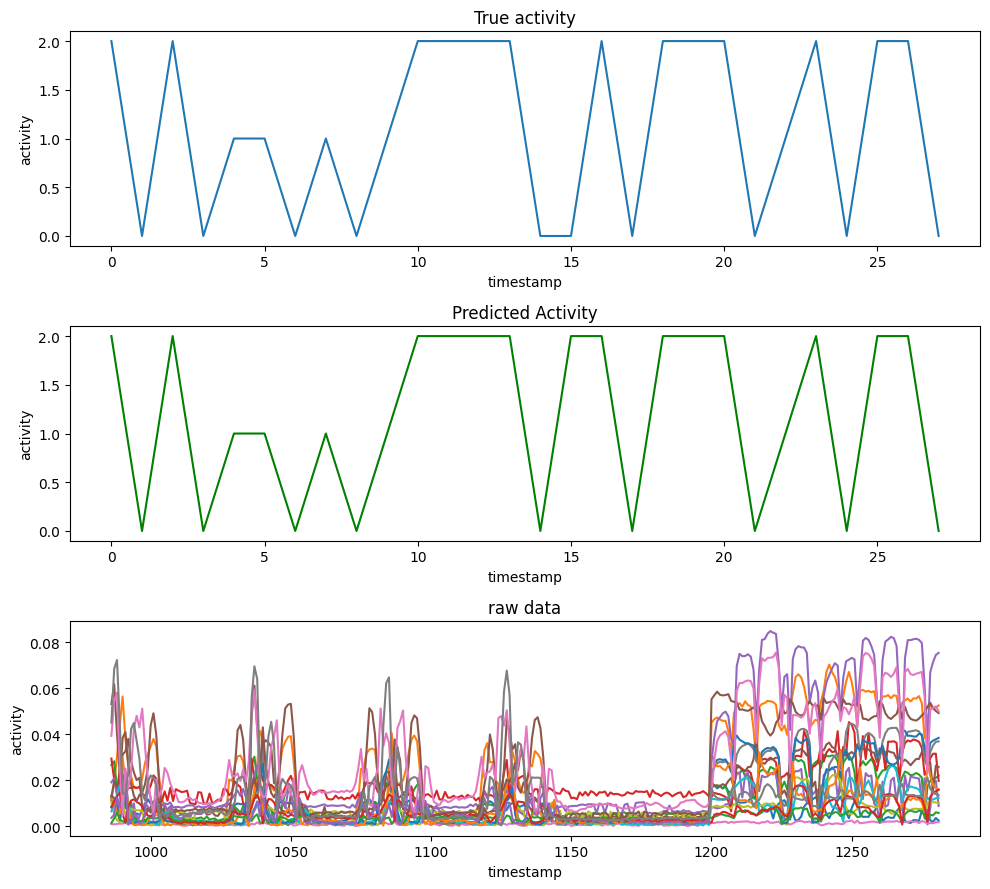

In [29]:

dd = X.iloc[986:]

plt.figure(figsize=(10, 9)) 

# combined predicted activity
combined_true_labels = y_true_labels
combined_pred_labels = []

for pred_labels in y_pred_labels:
    if np.isscalar(pred_labels):
        pred_labels = np.array([pred_labels])
    combined_pred_labels.extend(pred_labels)

combined_pred_labels = np.array(combined_pred_labels)

# Subplot 1: True activity
plt.subplot(3, 1, 1) 
plt.plot(combined_true_labels)
plt.title("True activity")
plt.xlabel("timestamp")
plt.ylabel("activity")

# Subplot 2: predicted activity
plt.subplot(3, 1, 2) 
plt.plot(combined_pred_labels,color='green')
plt.title("Predicted Activity")
plt.xlabel("timestamp")
plt.ylabel("activity")

# Subplot 3: raw data
plt.subplot(3, 1, 3) 
plt.plot(dd)
plt.title("raw data")
plt.xlabel("timestamp")
plt.ylabel("activity")

plt.tight_layout()
plt.show()


Confusion Matrix

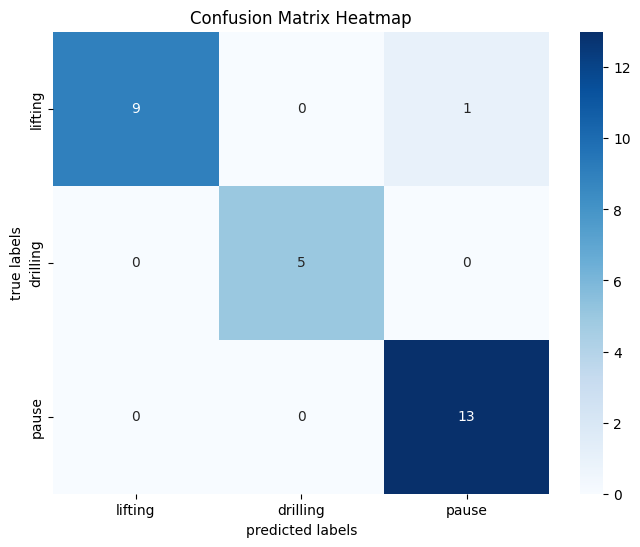

In [30]:
#confusion matrix 
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

#classes
class_labels = ["lifting", "drilling", "pause"]

#heapmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('predicted labels')
plt.ylabel('true labels')
plt.show()


